In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drugdf = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

#mouse_drugdf.head()
#clinical_df.head()
# Combine the data into a single dataset
merged_table = pd.merge(mouse_drugdf, clinical_df)
merged_table.head()
# Display the data table for preview



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_data = merged_table.loc[:,["Drug", "Timepoint", "Tumor Volume (mm3)"]]
#tumor_data.head()

#tumor = tumor_data["Tumor Volume (mm3)"].mean()

#group_data = tumor_data.groupby(["Drug", "Timepoint"])

res_tumor = tumor_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()
#print(res_tumor)

res_tumor = tumor_data.groupby(["Drug", "Timepoint"], as_index=False)["Tumor Volume (mm3)"].mean()
res_tumor.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#res_tumor.sem(axis=0)
# Convert to DataFrame
res_tumor = tumor_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].agg(sem)
# Preview DataFrame
#res_tumor.head()


In [4]:
res_tumor = pd.DataFrame(res_tumor).reset_index()
res_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [6]:
tumor_reformat = res_tumor.pivot(index = 'Timepoint', columns ='Drug', values = 'Tumor Volume (mm3)')
tumor_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


No handles with labels found to put in legend.


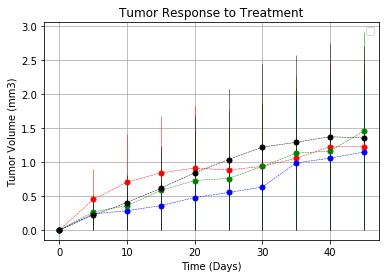

In [7]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_reformat.index, tumor_reformat['Capomulin'], yerr=tumor_reformat['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_reformat.index, tumor_reformat['Infubinol'], yerr=tumor_reformat['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_reformat.index, tumor_reformat['Ketapril'], yerr=tumor_reformat['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_reformat.index, tumor_reformat['Placebo'], yerr=tumor_reformat['Placebo'],
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

x_lim = len(tumor_reformat.index)

# Show the Figure
plt.legend(loc='best')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()


# Save the Figure
plt.savefig("C:\\Users\\richn\\Desktop\Tumor_Response.png")


In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [10]:
meta_data = merged_table.loc[:,["Drug", "Timepoint", "Metastatic Sites"]]
#meta_data.head()

res_meta = meta_data.groupby(["Drug", "Timepoint"], as_index=False)["Metastatic Sites"].mean()
res_meta.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
res_meta = meta_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].agg(sem)
# Convert to DataFrame
#res_meta.head()
# Preview DataFrame


In [12]:
res_meta = pd.DataFrame(res_meta).reset_index()
res_meta.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [13]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [14]:
meta_reformat = res_meta.pivot(index = 'Timepoint', columns ='Drug', values = 'Metastatic Sites')
meta_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


No handles with labels found to put in legend.


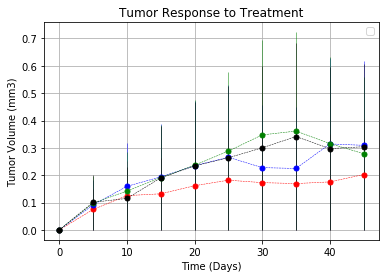

In [15]:
# Generate the Plot (with Error Bars)
plt.errorbar(meta_reformat.index, meta_reformat['Capomulin'], yerr=meta_reformat['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(meta_reformat.index, meta_reformat['Infubinol'], yerr=meta_reformat['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(meta_reformat.index, meta_reformat['Ketapril'], yerr=meta_reformat['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(meta_reformat.index, meta_reformat['Placebo'], yerr=meta_reformat['Placebo'],
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

x_lim = len(meta_reformat.index)

# Show the Figure
plt.legend(loc='best')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
# Save the Figure
plt.savefig("C:\\Users\\richn\\Desktop\Metastatic.png")
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [17]:
survival_data = merged_table.loc[:,["Drug", "Timepoint", "Mouse ID"]]
#meta_data.head()
res_survival = survival_data.groupby(["Drug", "Timepoint"], as_index=False)["Mouse ID"].count()                                  
res_survival.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [19]:
survival_reformat = res_survival.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse ID')
survival_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


No handles with labels found to put in legend.


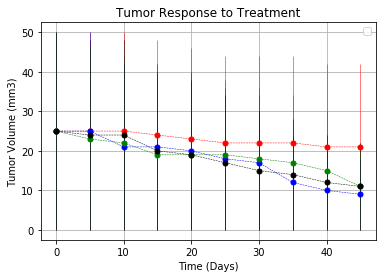

In [20]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(survival_reformat.index, survival_reformat['Capomulin'], yerr=survival_reformat['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_reformat.index, survival_reformat['Infubinol'], yerr=survival_reformat['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_reformat.index, survival_reformat['Ketapril'], yerr=survival_reformat['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_reformat.index, survival_reformat['Placebo'], yerr=survival_reformat['Placebo'],
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

x_lim = len(survival_reformat.index)

# Show the Figure
plt.legend(loc='best')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
# Save the Figure
plt.savefig("C:\\Users\\richn\\Desktop\survival.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug

percent_change = tumor_reformat.pct_change()
percent_change

pc = percent_change.iloc[9,:]/percent_change.iloc[2,9]*100
print(pc)

# Display the data to confirm


Drug
Capomulin     0.075988
Ceftamin     68.931857
Infubinol    21.298602
Ketapril     64.098828
Naftisol     67.073031
Placebo      -3.475568
Propriva     52.134369
Ramicane     21.959775
Stelasyn     29.673075
Zoniferol     1.276850
Name: 45, dtype: float64


In [22]:
# Splice the data between passing and failing drugs

tuple_percent_change = tuple(zip(pc.values))
tuple_percent_change_list = list(tuple_percent_change)
tuple_percent_change_list

[(0.0759881918980626,),
 (68.93185741721885,),
 (21.298601633306728,),
 (64.09882838404893,),
 (67.07303071513262,),
 (-3.4755677071416904,),
 (52.134368614232585,),
 (21.95977530653024,),
 (29.673075150315842,),
 (1.276849689808415,)]

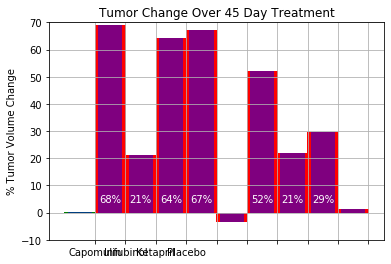

In [24]:


fig, barx = plt.subplots()
x_axis = np.arange(len(pc))  
barwidth = 1.02
rectsPass = barx.bar(x_axis[0], pc[0], barwidth, color='Green' )
rectsFail = barx.bar(x_axis[1:], pc[1:], barwidth, color='r')
plt.bar(x_axis, pc, color='b', alpha=0.5, align="center")
# Adding titles, x ticks, and axes titles
barx.set_ylabel('% Tumor Volume Change')
barx.set_title('Tumor Change Over 45 Day Treatment')
barx.set_xticks(x_axis +.5)
barx.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
barx.set_autoscaley_on(False)
barx.set_ylim([-10,70])
barx.grid(True)


# Use functions to label the percentages of changes

def autolabelFail(rects):
    for rec in rects:
        height = rec.get_height()
        barx.text(rec.get_x() + rec.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rec in rects:
        height = rec.get_height()
        barx.text(rec.get_x() + rec.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls

autolabelPass(rectsPass)
autolabelFail(rectsFail)
# Save the Figure

plt.savefig("C:\\Users\\richn\\Desktop\\bar_graph.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)